## BUG con OCR:
- "first_name" pasa a "_e" en la tabla "user" -> Done
- cuando tiene algo como "numeroTarjeta" se corta ahi..? -> tiene sentido ya que se aceptan "_", no mayusculas
- conviene separar las palabras con _ en vez de dejar todo junto -> especificar como condicion
- usar ejemplos que sean todo en ingles o todo en castellano, pero no los idiomas mezclados -> esto no importa tanto.. importa más que no haya mayusculas en los nombres

In [1]:
from paddleocr import draw_ocr, PaddleOCR
from glob import glob
from PIL import Image
import numpy as np
from IPython.display import display

In [2]:
import sys

sys.path.append("../")
from src.ocr_utils.ocr import get_ocr_model, predict_ocr, reescale
from src.line_detection.hough import get_tablas

2023-03-09 00:06:37.531656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 00:06:40.243562: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/cv2/../../lib64:
2023-03-09 00:06:40.243676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packag

In [3]:
FILES = glob("../data/images_testing/ocr*.jpeg")

map_files = {
    '../data/images_testing/ocr_test1.jpeg': \
            "/home/nacho/TFI-Cazcarra/data/imagenes_diagramas/ERDiagramsMySQL-65.png",
    
    '../data/images_testing/ocr_test2.jpeg':\
            "/home/nacho/TFI-Cazcarra/data/imagenes_diagramas/ERDiagramsMySQL-5.png",
    
    '../data/images_testing/ocr_test3.jpeg':\
            "/home/nacho/TFI-Cazcarra/data/imagenes_diagramas/ERDiagramsMySQL-63.png",
    
    '../data/images_testing/ocr_test4.jpeg':\
            "/home/nacho/TFI-Cazcarra/data/imagenes_diagramas/ERDiagramsMySQL-11.png",
    
    '../data/images_testing/ocr_test5.jpeg':\
            "/home/nacho/TFI-Cazcarra/data/imagenes_diagramas/ERDiagramsMySQL-15.png", 
      }

## Measure CRNN/SVTR

In [4]:
ocr_test1 = [
    ["user_authority", "user_id BIGINT", "authority BIGINT", "Indexes"],
    ["authority", "id BIGINT", "name VARCHAR(50)", "Indexes"],
    ["reclamo", "id BIGINT", "decision VARCHAR(255)", "estado VARCHAR(255)", "id_compra INT", 
     "reclamo VARCHAR(255)", "user_id BIGINT", "Indexes"],
    ["user", "id BIGINT", "email VARCHAR(50)", "enabled BIT(1)", "firstname VARCHAR(50)", 
     "lastpasswordresetdate DATETIME", "lastname VARCHAR(50)", "password VARCHAR(50)", "username VARCHAR(50)",
     "Indexes"],
    ["denuncia", "id BIGINT", "categoria VARCHAR(255)", "decision VARCHAR(255)", "denuncia VARCHAR(255)", 
     "estado VARCHAR(255)", "id_producto INT", "user_id BIGINT", "Indexes"],
]

ocr_test2 = [
    ['users', 'user_id INT(11)', "first_name VARCHAR(50)", "last_name VARCHAR(50)", "email VARCHAR(100)", 
     "username VARCHAR(30)", "pass_phrase VARCHAR(500)", 
     "is_admin TINYINT(4)", "date_registered DATETIME", "profile_pic VARCHAR(30)", 
     "registration_confirmed TINYINT(4)", "Indexes"],
    ["poems", "poem_id INT(11)", "title VARCHAR(200)", "poem TEXT", "date_submitted DATETIME", "category_id INT(11)", 
     "user_id INT(11)", "date_approved DATETIME", "Indexes"],
    ["tokens", "token_id INT(11)", "token CHAR(64)", "user_id INT(11)", "token_expires DATETIME", "Indexes"],
    ["categories", "category_id INT(11)", "category VARCHAR(100)", "Indexes"]
]

ocr_test3 = [
    ["me", "id INT", "followname VARCHAR(1000)", "followid INT", "user_id INT", "Indexes"],
    ["user", "id INT", "username VARCHAR(100)", "password VARCHAR(100)", "name VARCHAR(1000)", "Indexes"],
    ["post", "id INT", "img VARCHAR(100)", "text TEXT", "title VARCHAR(64)", "iduser VARCHAR(64)", 
     "date DATETIME", "user_id INT", "Indexes"],
]

ocr_test4 = [
    ["address", "address_id SMALLINT(5)", "address VARCHAR(50)", "address2 VARCHAR(50)", "district VARCHAR(20)", 
     "city_id SMALLINT(5)", "postal_code VARCHAR(10)", "phone VARCHAR(20)", "last_update TIMESTAMP", "Indexes"],
    ["city", "city_id SMALLINT(5)", "city VARCHAR(50)", "country_id SMALLINT(5)", "last_update TIMESTAMP", "Indexes"]
]

ocr_test5 = [
    ["city", "city_id SMALLINT","city VARCHAR(50)", "country_id SMALLINT", "last_update TIMESTAMP", "Indexes"],
    ["country", "country_id SMALLINT", "country VARCHAR(50)", "last_update TIMESTAMP", "Indexes"],
    ["address", "address_id SMALLINT", "address VARCHAR(50)", "address2 VARCHAR(50)", "district VARCHAR(20)",
     "city_id SMALLINT", "postal_code VARCHAR(10)", "phone VARCHAR(20)", "last_update TIMESTAMP", "Indexes"],
    ["customer", "customer_id SMALLINT", "store_id TINYINT", "first_name VARCHAR(45)", "last_name VARCHAR(45)",
     "email VARCHAR(50)", "address_id SMALLINT", "active BOOLEAN", "create_date DATETIME", 
     "last_update TIMESTAMP", "Indexes"]
]

In [5]:
svtr_test1 = [
    ['userauthority', 'user_id BIGINT', 'authority_id BIGINT', 'Indexes'],
    ['authority', '7 id BIGINT', 'name VARCHAR(50)', 'Indexes'],
    ['reclamo', ' id BIGINT', 'decision VARCHAR(255)', 'estado VARCHAR(255', 'id_compra INT', 'reclamo VARCHAR(255', 'user_id BIGINT', 'Indexes'],
    ['user', 'id BIGINT', 'email VARCHAR50', 'enabled BIT1', 'firstnam e VARCHAR(50', 'lastpasswordresetdate DATETIME', 'lastname VARCHAR(50)', 'password VARCHAR(100', 'usernameVARCHAR(50', 'Indexes'],
    [' denuncia', '7 id BIGINT', 'categoria V ARCHAR(255)', 'decision VARCHAR(255)', 'denuncia VARCHAR(255)', 'estado VARCHAR(255', 'id_producto INT', 'user_id BIGINT', 'Indexes'],
]

svtr_test2 = [
    ['m','users',' user_id INT(11)','first_name VARCHAR(50)','last_name VARCHAR(50)','email VARCHAR(100)','username VARCHAR(30)','pass_phrase VARCHAR(500)','is_admin TINYINT(4)','date_registered DATETIME','profile_pic VARCHAR(30)','registration_confirmed TINYINT(4)','Indexes','>'],
    ['I','poems','7 poem_id INT(11)','title VARCHAR(200)','poem TEXT','date_submitted DATETIME','category_id INT(11)','>user_id INT(11)','date_approved DATETIME','Indexes','>'],
    ['W','tokens','V',' token_id INT(11)','token CHAR(64)','user_id INT(11)','token_expires DATETIME','Indexes','>'],
    ['categories',' category_id INT(11)','category VARCHAR(100','Indexes']
]

svtr_test3 = [
    ['me', '7 id INT', 'followname VARCHAR(1000', 'followid INT', 'user_id INT', 'Indexes'],
    ['user', '7 id INT', 'username VARCHAR(100', 'password VARCHAR(100)', 'name VARCHAR(1000)', 'Indexes'],
    [' post', '7 id INT', 'img VARCHAR(100)', ' text TEXT', 'title VARCHAR(64)', 'iduser VARCHAR(64)', 'date DATETIME', 'user_id INT', 'Indexes', 'A']
]

svtr_test4 = [
    ['address', ' address_id SMALLINT(5)', 'V address V ARCHAR(50)', 'V address2 V ARCHAR(50)',
     ' district VARCH AR(20)','city_id SMALLINT(S)','V postal_code V ARCHAR (10)',' phone VARCH AR(20',
     'l ast_update TIMEST AMP','Indexes','7'],
    [' city', '9 city_id SMALLINT(S)', 'V city VARCHAR(50)', 'country_id SMALLINT(5)', 'last_update TIMEST AMP', 'Indexes', 'I']
]

svtr_test5 = [
    ['city', 'Y city_id SMALLINT', 'city VARCHAR(50)', 'country_id SMALLINT', 'last_update TIMESTAMP', 'Indexes'],
    ['country', 'country_id SMALLINT', 'country VARCHAR(50)', 'last_update TIMESTAMP', 'Indexes'],
    ['address', '? address_id SMALLINT', 'addressVARCHAR(50)', 'address2 VARCHAR(50)', 'district VARCHAR(20)', 'city_id SMALLINT', 'postal_code VARCHAR(10', 'phone VARCHAR(20)', 'last_update TIMESTAMP', 'Indexes'],
    ['customer', ' customer_id SMALLINT', 'store_id TINYINT', 'first_name VARCHAR(45)', 'lastnameVARCHAR(45', 'email VARCHAR(50', 'address_id SMALLINT', 'active BOOLEAN', 'create_date DATETIME', 'last_update TIMESTAMP', 'Indexes'],
]

In [6]:
crnn_test1 = [
    ['Luser_authority', 'OUSER_ID BIGINT', 'O AUTHORITY.ID BIGINT', 'INDEXEs'], 
    ['mauthority', 'TID BIGINT', ': NAME VARCHAR(50)', 'INdexes'], 
    ['三', 'reclamo', 'TID BIGINT', 'O DECISION VARCHAR(255)', 'D ESTADO VARCHAR(255)', 'DID_COMPRA INT', 'ORECLAMO VARCHAR(255)', 'OUSER _ID BIGINT', 'INDEXes', 'V'], 
    ['user', '*ID BIGINT', 'CEMAIL VARCHAR(50)', 'CENABLED BT(1)', ': FRSTNAM E VARCHAR(50)', 'LASTPASSWORDRESETDATE DATETIME', 'CLASTNAME VARCHAR(50)', ' PASSWORD VARCHAR(100)', ' USERNAME VARCHAR(50)', 'INDExes'], 
    ['mdenuncia', 'TID BIGINT', 'O CATEGORIA VARCHAR(255)', 'O DECISION VARCHAR(255)', 'ODENUNCIA VARCHAR(255)', 'O ESTADO VARHAR(255)', 'DID PRODUCTO INT', 'USER ID BIGINT', 'Indexes', '一']
]

crnn_test2 = [
    ['三', 'users', '* USER ID INT(11)', ': FIRST NAME VARCHAR(50)', 'C AST NAME VARCHAR(50)', ': EMAIL VARCHAR(100)', ': USERNAME VARCHAR(30)', ': pass PhraSe VARCHAR(500)', 'CIS ADMIN TINYINT(4)', ': Date REGISTERED DATETIME', 'PROFLE PIC VARCHAR(30)', '* REGISTRATION CONFIRMED TINYINT(4)', 'Indexes', '一'] ,
    ['山', 'poems', '* POEM ID INT(11)', ': TITLe VARCHAR(200)', ' POEM TEXT', ': DATE SUBMITTED DATETIME', 'O CATEGORY ID INT(11)', 'OUSER ID INT(11)', ' date_apprOVed DATETIME', 'Indexes', '一'] ,
    ['三', 'tokens', '警', '* TOKEN ID INT(11)', 'O TOKEN CHAR(64)', 'OUSER ID INT(11)', ' toKen eXPIRES DATETIME', 'Indexes', '一'] ,
    ['categories', '* CATEGORY ID INT(11)', ': CATEGORY VARCHAR(100)', 'Indexes']
]

crnn_test3 = [
    ['Ime', 'TID INT', 'O FDLLONNAME VARCHAR(1000)', 'O FALONID INT', 'OUSER_ID INT', 'INDexes', '一'], 
    ['目', 'user', 'TIDINT', 'O USERNAME VARCHAR(100)', ': PASSWORD VARCHAR(100)', 'O NAME VARCHAR(1000)', 'INdexes', '一'], 
    ['二post', 'TIDINT', 'CIMG VARCHAR(100)', 'O TEXT TEXT', 'O TITLE VARCHAR(64)', 'DIDUSE VARAR(64)', ': DATE DATETIME', 'OUSER_ID INT', 'INDEXEs', 'A']
]

crnn_test4 = [
    ['maddress', '1 ADDRESS ID SMALLINT (5)', ' address VARCHAR(50)', ' address2 VARCHAR(50)', '< distict VARCAR(20)', 'GTy _IDd SMALLINT (5)', '? postal_COde VARCHAR(10)', ': PHONE VARCHAR(20)', '>last update TIMESTAMP', 'Indexes', 'V'] ,
    ['』aty', '7 GTY_ID SMALLINT (5)', ': dty VARCHAR(50)', ': COUNTRY ID SMALLINT (5)', 'OlAST UPDATE TIMESTAMP', 'Indexes', 'V']
]

crnn_test5 = [
    ['city', 'T CITY ID SMALLINT', 'CIT VARCHAR(50)', ' COUNTRY ID SMALLINT', '*LAST _UPDATE TIMESTAMP', 'Indexes'], 
    ['山', 'country', 'COUNTRY ID SMALLINT', ': COUNTRY VARCHAR(50)', 'CAST UPDATE TIMESTAMP', 'Indexes'], 
    ['address', 'P ADDRESS ID SMALLINT', ': ADDRESS VARCHAR(50)', 'O ADDRESS2 VARCHAR(50)', ': DISTRICT VARCHAR(20)', ' CITY-ID SMALLINT', 'O POSTAL CODE VARCHAR(10)', ': PHONE VARAR(20)', 'CLAST UPDATE TIMESTAMP', 'INdexes'], 
    ['customer', '1 CUSTOMER ID SMALLINT', '* STORE ID TINYINT', ': FIRST NAME VARCHAR(45)', 'CIAST NAME VARCHAR(45)', ':EMAIL VARCAR(50)', 'ADDRESS ID SMALLINT', 'D ACTIVE BOOLEAN', '* CREATE DATE DATETIME', 'OIAST UPDATE TIMESTAMP', 'INdexes']
]

In [7]:
import evaluate
cer = evaluate.load("cer")

In [8]:
cleaned_tests = [[['userauthority', 'user_id', 'BIGINT', 'authority_id', 'BIGINT', 'Indexes'],
  ['authority', 'id', 'BIGINT', 'name', 'VARCHAR(50)', 'Indexes'],
  ['reclamo',
   'id',
   'BIGINT',
   'decision',
   'VARCHAR(255)',
   'estado',
   'VARCHAR(255)',
   'id_compra',
   'INT',
   'reclamo',
   'VARCHAR(255)',
   'user_id',
   'BIGINT',
   'Indexes'],
  ['user',
   'id',
   'BIGINT',
   'email',
   'VARCHAR(50)',
   'enabled',
   'BIT(1)',
   'firstnam_e',
   'VARCHAR(50)',
   'lastpasswordresetdate',
   'DATETIME',
   'lastname',
   'VARCHAR(50)',
   'password',
   'VARCHAR(100)',
   'username',
   'VARCHAR(50)',
   'Indexes'],
  ['denuncia',
   'id',
   'BIGINT',
   'categoria',
   'VARCHAR(255)',
   'decision',
   'VARCHAR(255)',
   'denuncia',
   'VARCHAR(255)',
   'estado',
   'VARCHAR(255)',
   'id_producto',
   'INT',
   'user_id',
   'BIGINT',
   'Indexes']],
 [['users',
   'user_id',
   'INT(11)',
   'first_name',
   'VARCHAR(50)',
   'last_name',
   'VARCHAR(50)',
   'email',
   'VARCHAR(100)',
   'username',
   'VARCHAR(30)',
   'pass_phrase',
   'VARCHAR(500)',
   'is_admin',
   'TINYINT(4)',
   'date_registered',
   'DATETIME',
   'profile_pic',
   'VARCHAR(30)',
   'registration_confirmed',
   'TINYINT(4)',
   'Indexes'],
  ['poems',
   'poem_id',
   'INT(11)',
   'title',
   'VARCHAR(200)',
   'poem',
   'TEXT',
   'date_submitted',
   'DATETIME',
   'category_id',
   'INT(11)',
   'user_id',
   'INT(11)',
   'date_approved',
   'DATETIME',
   'Indexes'],
  ['tokens',
   'token_id',
   'INT(11)',
   'token',
   'CHAR(64)',
   'user_id',
   'INT(11)',
   'token_expires',
   'DATETIME',
   'Indexes'],
  ['categories',
   'category_id',
   'INT(11)',
   'category',
   'VARCHAR(100)',
   'Indexes']],
 [['me',
   'id',
   'INT',
   'followname',
   'VARCHAR(1000)',
   'followid',
   'INT',
   'user_id',
   'INT',
   'Indexes'],
  ['user',
   'id',
   'INT',
   'username',
   'VARCHAR(100)',
   'password',
   'VARCHAR(100)',
   'name',
   'VARCHAR(1000)',
   'Indexes'],
  ['post',
   'id',
   'INT',
   'img',
   'VARCHAR(100)',
   'text',
   'TEXT',
   'title',
   'VARCHAR(64)',
   'iduser',
   'VARCHAR(64)',
   'date',
   'DATETIME',
   'user_id',
   'INT',
   'Indexes']],
 [['address',
   'address_id',
   'SMALLINT(5)',
   'address',
   'VARCHAR(50)',
   'a_address',
   'VARCHAR(50)',
   'district',
   'VARCHAR(20)',
   'city_id',
   'SMALLINT',
   'postal_code',
   'VARCHAR(10)',
   'phone',
   'VARCHAR(20)',
   'last_update',
   'TIMESTAMP',
   'Indexes'],
  ['city',
   'city_id',
   'SMALLINT',
   'city',
   'VARCHAR(50)',
   'country_id',
   'SMALLINT(5)',
   'last_update',
   'TIMESTAMP',
   'Indexes']],
 [['city',
   'city_id',
   'SMALLINT',
   'city',
   'VARCHAR(50)',
   'country_id',
   'SMALLINT',
   'last_update',
   'TIMESTAMP',
   'Indexes'],
  ['country',
   'country_id',
   'SMALLINT',
   'country',
   'VARCHAR(50)',
   'last_update',
   'TIMESTAMP',
   'Indexes'],
  ['address',
   'address_id',
   'SMALLINT',
   'address',
   'VARCHAR(50)',
   'address2',
   'VARCHAR(50)',
   'district',
   'VARCHAR(20)',
   'city_id',
   'SMALLINT',
   'postal_code',
   'VARCHAR(10)',
   'phone',
   'VARCHAR(20)',
   'last_update',
   'TIMESTAMP',
   'Indexes'],
  ['customer',
   'customer_id',
   'SMALLINT',
   'store_id',
   'TINYINT',
   'first_name',
   'VARCHAR(45)',
   'lastname',
   'VARCHAR(45)',
   'email',
   'VARCHAR(50)',
   'address_id',
   'SMALLINT',
   'active',
   'BOOLEAN',
   'create_date',
   'DATETIME',
   'last_update',
   'TIMESTAMP',
   'Indexes']]]

In [98]:
tests = [ocr_test1,ocr_test2,ocr_test3,ocr_test4,ocr_test5]
crnn_tests = [crnn_test1,crnn_test2,crnn_test3,crnn_test4,crnn_test5]
svtr_tests = [svtr_test1,svtr_test2,svtr_test3,svtr_test4,svtr_test5]

all_crnn = []
all_svtr = []
all_cleaned = []
for real, svtr_text, crnn_text, cleaned in zip(tests[1:2], svtr_tests[1:2], crnn_tests[1:2], cleaned_tests[1:2]):
    
    cer_crnn = []
    cer_svtr = []
    cer_cleaned = []
    for i in range(len(real)):
        cer_crnn.append(cer.compute(predictions=[" ".join(crnn_text[i])], references=[" ".join(real[i])]))
        cer_svtr.append(cer.compute(predictions=[" ".join(svtr_text[i])], references=[" ".join(real[i])]))
        cer_cleaned.append(cer.compute(predictions=[" ".join(cleaned[i])], references=[" ".join(real[i])]))
        
        print("=================")
        print("=================")
        print("REAL"," ".join(real[i]), sep="\n")
        print("CRNN", " ".join(crnn_text[i]), sep="\n")
        print("SVTR", " ".join(svtr_text[i]), sep="\n")
        print("CLEANED", " ".join(cleaned[i]), sep="\n")
        print("=================")
        print("=================")

    all_crnn.append(sum(cer_crnn)/len(cer_crnn))    
    all_svtr.append(sum(cer_svtr)/len(cer_svtr))
    all_cleaned.append(sum(cer_cleaned)/len(cer_cleaned))
    
    print(all_crnn, all_svtr, all_cleaned)

REAL
users user_id INT(11) first_name VARCHAR(50) last_name VARCHAR(50) email VARCHAR(100) username VARCHAR(30) pass_phrase VARCHAR(500) is_admin TINYINT(4) date_registered DATETIME profile_pic VARCHAR(30) registration_confirmed TINYINT(4) Indexes
CRNN
三 users * USER ID INT(11) : FIRST NAME VARCHAR(50) C AST NAME VARCHAR(50) : EMAIL VARCHAR(100) : USERNAME VARCHAR(30) : pass PhraSe VARCHAR(500) CIS ADMIN TINYINT(4) : Date REGISTERED DATETIME PROFLE PIC VARCHAR(30) * REGISTRATION CONFIRMED TINYINT(4) Indexes 一
SVTR
m users  user_id INT(11) first_name VARCHAR(50) last_name VARCHAR(50) email VARCHAR(100) username VARCHAR(30) pass_phrase VARCHAR(500) is_admin TINYINT(4) date_registered DATETIME profile_pic VARCHAR(30) registration_confirmed TINYINT(4) Indexes >
CLEANED
users user_id INT(11) first_name VARCHAR(50) last_name VARCHAR(50) email VARCHAR(100) username VARCHAR(30) pass_phrase VARCHAR(500) is_admin TINYINT(4) date_registered DATETIME profile_pic VARCHAR(30) registration_confirmed 

In [99]:
print("CRNN", sum(all_crnn)/len(all_crnn))
print("SVTR", sum(all_svtr)/len(all_svtr))
print("CLEANED", sum(all_cleaned)/len(all_cleaned))

## Plot for TFI doc

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [94]:
def plot_text(text_list, algorithm):
    fig = plt.figure(figsize=(5,3))
    ax = fig.add_subplot()
    fig.subplots_adjust(top=0.85)
    
    ax.set_title(algorithm)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis([0, 15, 0, 15])
    
    table_name = text_list[0]
    initial_pos = 13.5
    ax.text(0.5, initial_pos, table_name, fontsize=10)
    initial_pos -= 2
    for attribute in chunks(text_list[1:-1], 2):
        ax.text(0.5, initial_pos, " ".join(attribute), fontsize=9)
        initial_pos -= 2

In [330]:
def plot_text2(text_lists, algorithms):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
    fig.subplots_adjust(top=0.85)
    
    for i, axs in zip([0,2], axes):
        for j, ax in zip([0,1],axs):
            j += i
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis([0, 15, 0, 15])
            ax.set_title(algorithms[j])

            table_name = text_lists[j][0][0]
            initial_pos = 13.3
            ax.text(0.5, initial_pos, table_name, fontsize=12)
            pos = initial_pos-1.6
            text = text_lists[j]
            for attribute in text[1:]:
                ax.text(0.5, pos, " ".join(attribute), fontsize=10)
                pos -= 1.4
    plt.subplots_adjust(wspace=0.05, hspace=0.2)
    plt.show()

In [331]:
real = [
    ["address"], 
 ["address_id SMALLINT(5)"], ["address VARCHAR(50)"], 
 ["address2 VARCHAR(50)"], ["district VARCHAR(20)"], 
 ["city_id SMALLINT(5)"], ["postal_code VARCHAR(10)"], 
 ["phone VARCHAR(20)"], ["last_update TIMESTAMP"], 
 ["Indexes"]]

crnn = [
    ['maddress'], 
 ['1 ADDRESS ID SMALLINT (5)'], [' address VARCHAR(50)'], 
 [' address2 VARCHAR(50)'], ['< distict VARCAR(20)'], 
 ['GTy _IDd SMALLINT (5)'], ['? postal_COde VARCHAR(10)'], 
 [': PHONE VARCHAR(20)'], ['>last update TIMESTAMP'], 
 ['Indexes', 'V']]

svtr = [
    ['address'], 
 [' address_id SMALLINT(5)'], ['V address V ARCHAR(50)'], 
 ['V address2 V ARCHAR(50)'],[' district VARCH AR(20)'],
 ['city_id SMALLINT(S)'], ['V postal_code V ARCHAR (10)'],
 [' phone VARCH AR(20'], ['l ast_update TIMEST AMP'],
 ['Indexes','7']]

cleaned = [
    ['address'],
   ['address_id','SMALLINT(5)'], ['address','VARCHAR(50)'],
   ['a_address','VARCHAR(50)'], ['district','VARCHAR(20)'],
   ['city_id','SMALLINT'], ['postal_code','VARCHAR(10)'],
   ['phone','VARCHAR(20)'], ['last_update','TIMESTAMP'],
   ['Indexes']]

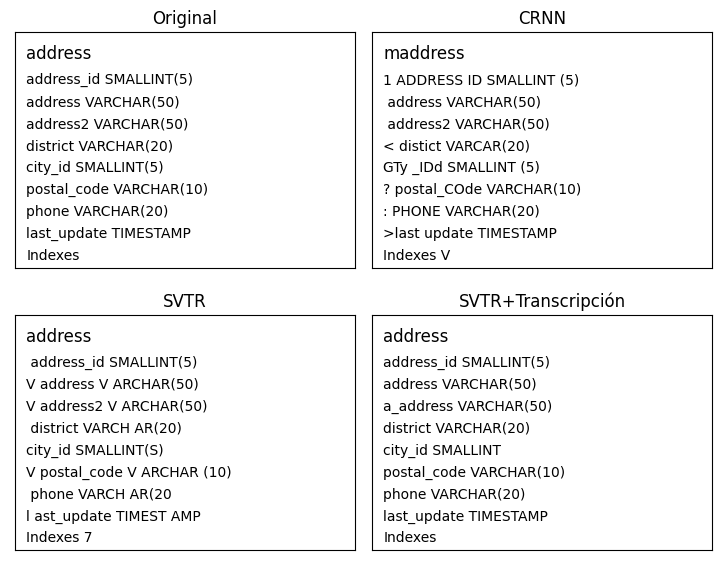

In [332]:
plot_text2(text_lists=[real,crnn,svtr,cleaned], algorithms=["Original","CRNN","SVTR","SVTR+Transcripción"])